<a href="https://colab.research.google.com/github/shadab4150/practice_projects/blob/master/coronavirus_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip '/content/novel-corona-virus-2019-dataset.zip' -d '/content/corona/'

Archive:  /content/novel-corona-virus-2019-dataset.zip
  inflating: /content/corona/2019_nCoV_data.csv  
  inflating: /content/corona/time_series_2019_ncov_confirmed.csv  
  inflating: /content/corona/time_series_2019_ncov_deaths.csv  
  inflating: /content/corona/time_series_2019_ncov_recovered.csv  


In [0]:
!pip install squarify

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import numpy as np
import squarify 
from itertools import cycle, islice

def repeatlist(it, count):
    return islice(cycle(it), count)
%matplotlib inline

In [0]:
df = pd.read_csv('/content/2019_nC0v_20200121_20200126_cleaned.csv')

In [0]:
df.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [0]:
corona['Date last updated']=pd.to_datetime(corona['Date last updated'],errors='coerce')

In [0]:
country=df[['Country','Confirmed', 'Suspected', 'Recovered', 'Deaths']].groupby(['Country']).agg({'Confirmed':'sum','Suspected':'sum','Recovered':'sum','Deaths':'sum'})

In [0]:
country.reset_index(inplace=True,)

In [0]:
country

,Country,Confirmed,Suspected,Recovered,Deaths
0,Australia,13.0,1.0,0.0,0.0
1,Brazil,0.0,1.0,0.0,0.0
2,Canada,1.0,0.0,0.0,0.0
3,Colombia,0.0,1.0,0.0,0.0
4,France,14.0,0.0,0.0,0.0
5,Hong Kong,29.0,1139.0,0.0,0.0
6,Japan,18.0,0.0,1.0,0.0
7,Macau,18.0,0.0,0.0,0.0
8,Mainland China,10053.0,839.0,275.0,265.0
9,Malaysia,13.0,4.0,0.0,0.0


(0, 80)

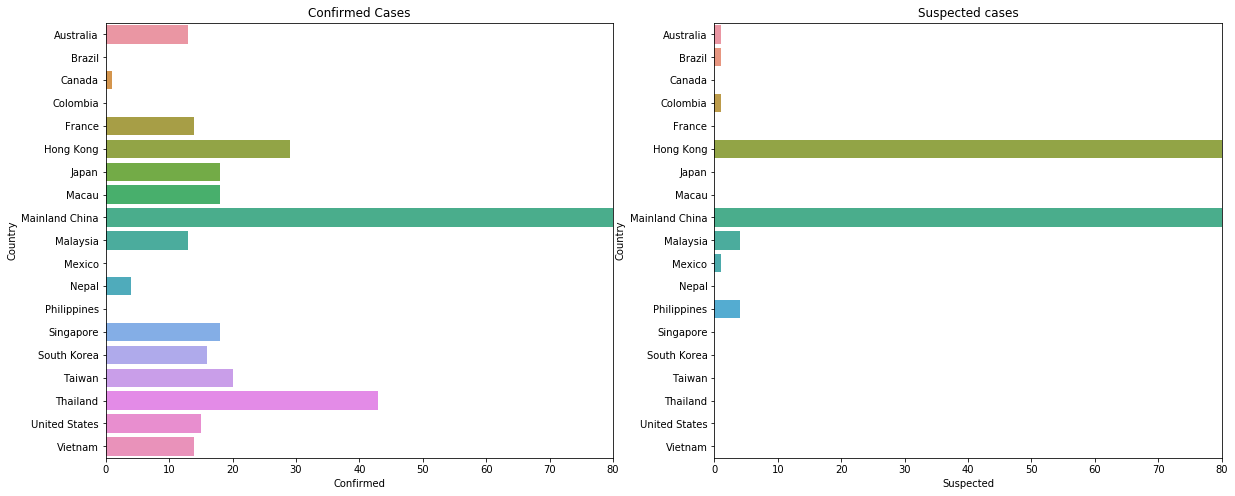

In [0]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.barplot(data=country,y='Country',x='Confirmed');
plt.title('Confirmed Cases')
plt.xlim(0,80)
plt.subplot(122)
sns.barplot(data=country,y='Country',x='Suspected');
plt.title('Suspected cases')
plt.xlim(0,80)

In [0]:
china=df[df['Country']=='Mainland China'].copy()
china.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
5,5,Sichuan,Mainland China,1/21/2020,2.0,1.0,0.0,0.0


In [0]:
china_cases=china[['Province/State','Confirmed', 'Suspected', 'Recovered', 'Deaths']].groupby(['Province/State']).agg({'Confirmed':'sum','Suspected':'sum','Recovered':'sum','Deaths':'sum'})
china_cases.reset_index(inplace=True,)
china_cases.head(15)

,Province/State,Confirmed,Suspected,Recovered,Deaths
0,Anhui,238.0,35.0,0.0,0.0
1,Beijing,304.0,22.0,8.0,0.0
2,Chongqing,338.0,26.0,0.0,0.0
3,Fujian,102.0,70.0,0.0,1.0
4,Gansu,28.0,0.0,0.0,0.0
5,Guangdong,546.0,6.0,14.0,0.0
6,Guangxi,158.0,2.0,0.0,0.0
7,Guizhou,28.0,1.0,0.0,0.0
8,Hainan,102.0,97.0,0.0,0.0
9,Hebei,48.0,0.0,0.0,7.0


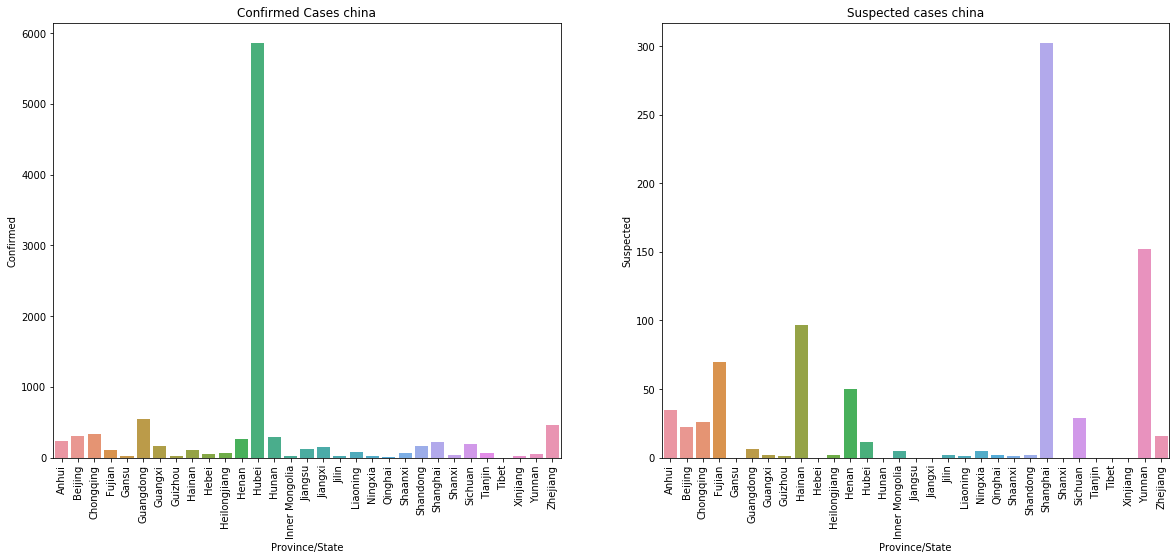

In [0]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.barplot(data=china_cases,x='Province/State',y='Confirmed');
plt.title('Confirmed Cases china')
plt.xticks(np.arange(31),china_cases['Province/State'].values,rotation=90);
plt.subplot(122)
sns.barplot(data=china_cases,x='Province/State',y='Suspected');
plt.title('Suspected cases china')
plt.xticks(np.arange(31),china_cases['Province/State'].values,rotation=90);

In [0]:
china_cases.shape[0]

31

# Deaths in china

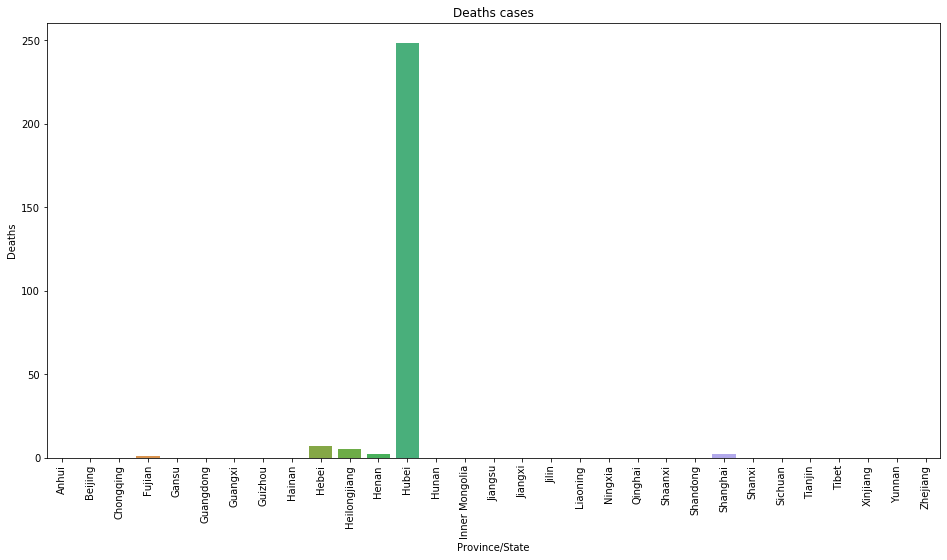

In [0]:
plt.figure(1,figsize=(16,8))
sns.barplot(data=china_cases,x='Province/State',y='Deaths');
plt.title('Deaths cases')
plt.xticks(np.arange(31),china_cases['Province/State'].values,rotation=90)
plt.show()

In [0]:
df1 = pd.read_csv('/content/corona/time_series_2019_ncov_confirmed.csv')
df11 = pd.read_csv('/content/corona/time_series_2019_ncov_confirmed.csv')

In [0]:
df1.head(5)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,02/01/20 10:00,02/02/20 21:00,02/03/20 21:00,02/04/20 9:40,02/04/20 22:00,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 22:04,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20,confirmed
0,Anhui,Mainland China,31.82571,117.2264,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665,733,733,779,779,830,830.0
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297,315,315,326,326,337,337.0
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415,426,428,446,450,468,468.0
3,Fujian,Mainland China,26.07783,117.9895,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224,239,239,250,250,261,261.0
4,Gansu,Mainland China,36.06110,103.8343,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67,71,79,79,79,83,83.0


In [0]:
df11.fillna(0,inplace=True)

In [0]:
col_list=['1/21/20 22:00',
       '1/22/20 12:00', '1/23/20 12:00', '1/24/20 0:00', '1/24/20 12:00',
       '1/25/20 0:00', '1/25/20 12:00', '1/25/20 22:00', '1/26/20 11:00',
       '1/26/20 23:00', '1/27/20 9:00', '1/27/20 19:00', '1/27/20 20:30',
       '1/28/20 13:00', '1/28/20 18:00', '1/28/20 23:00', '1/29/20 13:30',
       '1/29/20 14:30', '1/29/20 21:00', '1/30/20 11:00', '1/31/20 14:00',
       '02/01/20 10:00', '02/02/20 21:00', '02/03/20 21:00', '02/04/20 9:40',
       '02/04/20 22:00', '02/05/20 9:00', '02/05/20 23:00', '02/06/20 9:00',
       '02/06/20 14:20', '02/07/20 20:13', '02/07/20 22:50', '02/08/20 22:04',
       '02/08/20 23:04', '02/09/20 10:30', '02/09/20 23:20']

In [0]:
df1['confirmed'] = df1[col_list].max(axis=1)

In [0]:
df1.drop(col_list,axis=1,inplace=True)
df1.head()

,Province/State,Country/Region,Lat,Long,confirmed
0,Anhui,Mainland China,31.82571,117.2264,830.0
1,Beijing,Mainland China,40.18238,116.4142,337.0
2,Chongqing,Mainland China,30.05718,107.8740,468.0
3,Fujian,Mainland China,26.07783,117.9895,261.0
4,Gansu,Mainland China,36.06110,103.8343,83.0


In [0]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df1, lat='Lat',lon="Long", hover_name="Province/State",color='Country/Region',size='confirmed',
                     projection="natural earth",height=720,width=1280)
fig.show()

<center><img src="https://i.ibb.co/Dky1Zjp/newplot24.png" width="1980" height="500"/></center>

In [0]:
color = ['r', 'g', 'b','c','m','y','gold','orange','skyblue','pink','cyan','lime','olive','purple']

# Treemap of confirmed cases in outside of china

In [0]:
new_con=df1[['Country/Region','confirmed']].groupby(['Country/Region']).agg({'confirmed':'sum'})
new_con.reset_index(inplace=True)

In [0]:
new_con.shape

(29, 2)

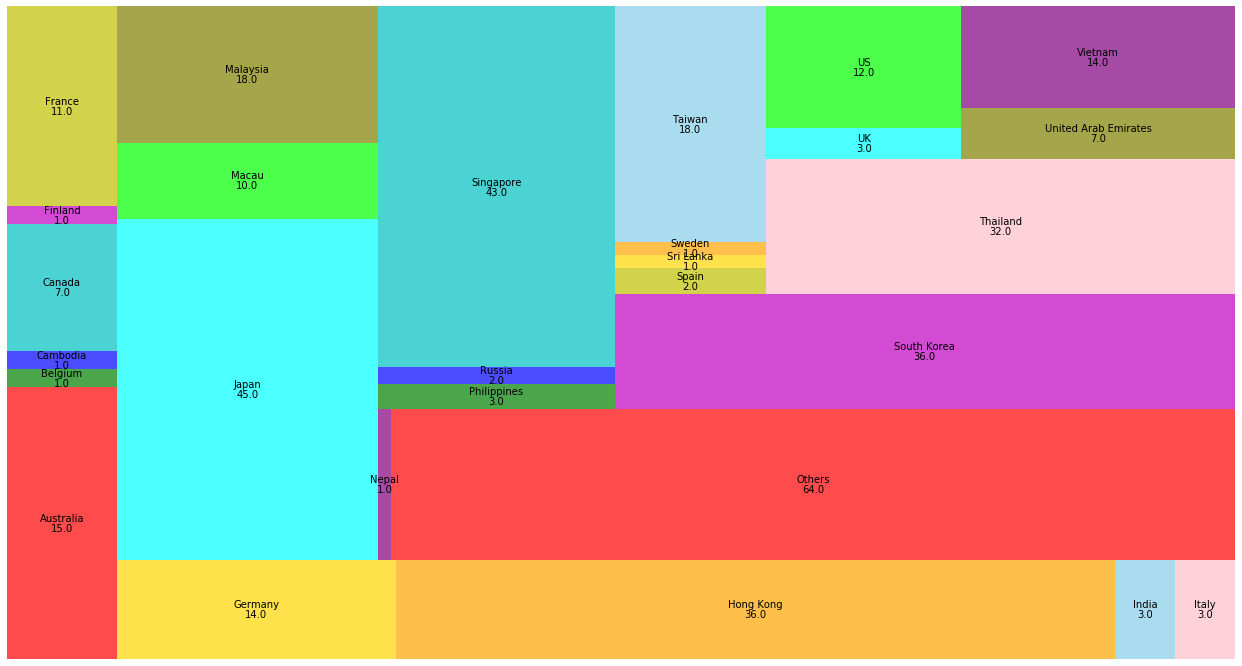

In [0]:
plt.figure(1,figsize=(22,12))
#color = ['r', 'g', 'b','c','m','y','gold','orange','skyblue']
color = list(repeatlist(color, 29))
squarify.plot(sizes=new_con[(new_con['confirmed']!=0)&(new_con['Country/Region']!='Mainland China')].confirmed.values.tolist(),
              label=new_con[(new_con['confirmed']!=0)&(new_con['Country/Region']!='Mainland China')]['Country/Region'].values.tolist(), alpha=.7,color=color,
              value=new_con[(new_con['confirmed']!=0)&(new_con['Country/Region']!='Mainland China')].confirmed.values.tolist())
plt.axis('off')
plt.show()


In [0]:
df1.head(3)

,Province/State,Country/Region,Lat,Long,confirmed,size
0,Anhui,Mainland China,31.82571,117.2264,830.0,100.821386
1,Beijing,Mainland China,40.18238,116.4142,337.0,87.301244
2,Chongqing,Mainland China,30.05718,107.8740,468.0,92.227024


In [0]:
china_new=df1[df1['Country/Region']=='Mainland China'][['Province/State','confirmed']].copy()

In [0]:
china_new.shape

(31, 2)

In [0]:
china_all=china[['Province/State','Confirmed', 'Suspected', 'Recovered', 'Deaths']].groupby(['Province/State']).agg({'Confirmed':'sum','Suspected':'sum','Recovered':'sum','Deaths':'sum'})
china_all.reset_index(inplace=True)

# Number of confirmed cases in china

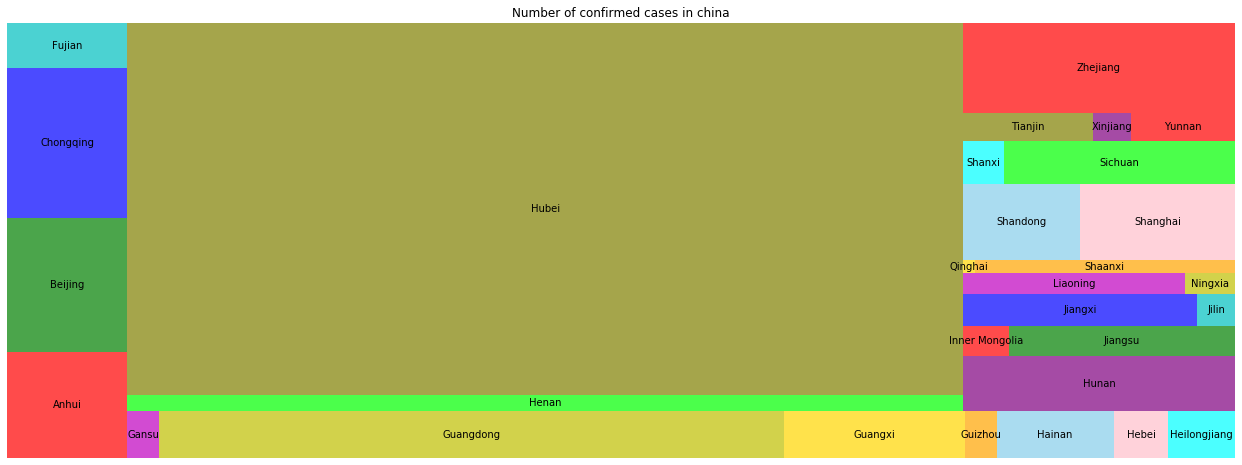

In [0]:
plt.figure(1,figsize=(22,8))
color = list(repeatlist(color, 31))
squarify.plot(sizes=china_all[china_all['Confirmed']!=0].Confirmed.values.tolist(),
              label=china_all[china_all['Confirmed']!=0]['Province/State'].values.tolist(), alpha=.7,color=color,
              )
plt.axis('off')
plt.title('Number of confirmed cases in china')
plt.show()


# Total Deaths in china

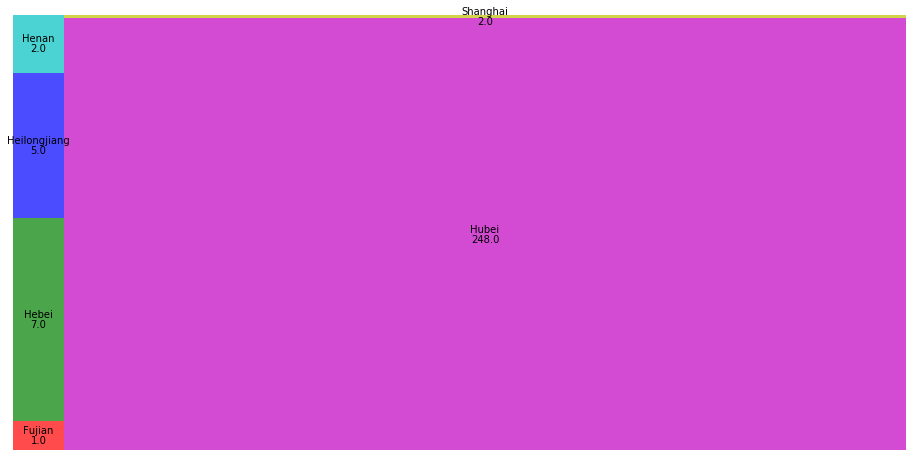

In [0]:
plt.figure(1,figsize=(16,8))
color = list(repeatlist(color, 6))
squarify.plot(sizes=china_all[china_all['Deaths']!=0].Deaths.values.tolist(),
              label=china_all[china_all['Deaths']!=0]['Province/State'].values.tolist(), alpha=.7,color=color,
              value=china_all[china_all['Deaths']!=0].Deaths.values.tolist())
plt.axis('off')

plt.show()


In [0]:
df2=df1[['Long','Lat','confirmed','Province/State']].copy()

In [0]:
df2.columns=['Longitue','Latitude','confirmed','Province/State']

In [0]:
df2['size']=np.log(df2.confirmed.values)*10
df2.head()

,Longitue,Latitude,confirmed,Province/State,geometry,size
0,117.2264,31.82571,10876.0,Anhui,POINT (117.22640 31.82571),92.943138
1,116.4142,40.18238,5465.0,Beijing,POINT (116.41420 40.18238),86.061194
2,107.8740,30.05718,7848.0,Chongqing,POINT (107.87400 30.05718),89.680140
3,117.9895,26.07783,4211.0,Fujian,POINT (117.98950 26.07783),83.454554
4,103.8343,36.06110,1234.0,Gansu,POINT (103.83430 36.06110),71.180162


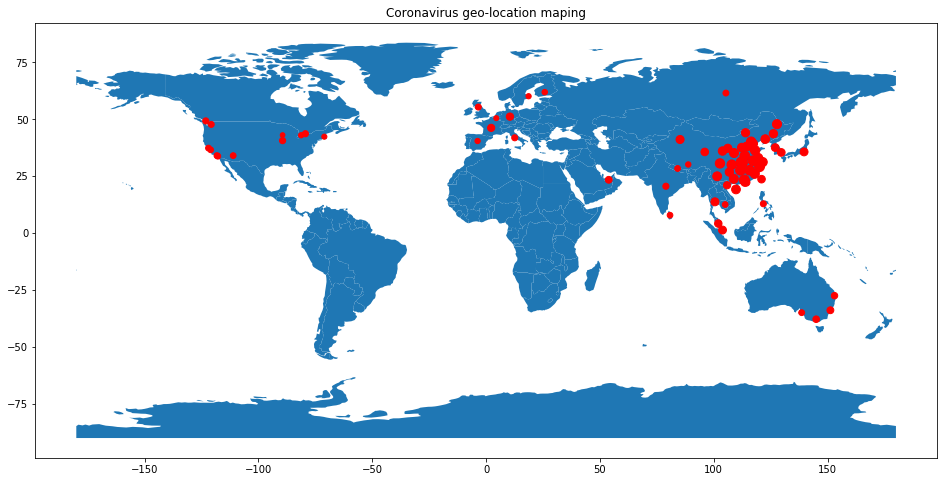

In [0]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df1['Long'], df1['Lat'])]
gdf = GeoDataFrame(df2, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 8)), marker='o', color='red', markersize='size',legend=True,categorical=False);
plt.title('Coronavirus geo-location maping');